<a href="https://colab.research.google.com/github/Aleena24/Medium_repo/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyswarm
!pip install deap

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=559027383f9c7cf1746951e1204ccecb52cbb42aef80ab2317dac2698dc47b55
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso
import random

In [ ]:
# Define the Rastrigin function
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in X])

# Define bounds for the problem
bounds = [(-5.12, 5.12)] * 2  # 2D Rastrigin

# Storage for convergence data
pso_convergence = []
ga_convergence = []
aco_convergence = []

In [ ]:
# PSO implementation with manual tracking
def pso_with_convergence():
    global pso_convergence
    def fitness(x):
        value = rastrigin(x)
        pso_convergence.append(value)  # Track the fitness at each iteration
        return value

    pso(fitness, [-5.12, -5.12], [5.12, 5.12], swarmsize=30, maxiter=50)

In [ ]:
# Genetic Algorithm (GA) implementation
def ga_with_convergence():
    global ga_convergence
    def fitness(individual):
        return rastrigin(individual)

    population_size = 50
    generations = 50
    mutation_rate = 0.1
    crossover_rate = 0.8

    # Initialize population
    population = [np.random.uniform(-5.12, 5.12, 2) for _ in range(population_size)]
    for _ in range(generations):
        population.sort(key=fitness)
        ga_convergence.append(fitness(population[0]))  # Track best fitness

        # Create next generation
        next_gen = population[:5]  # Elitism
        while len(next_gen) < population_size:
            if random.random() < crossover_rate:
                # Crossover
                parents = random.sample(population[:20], 2)
                crossover_point = random.randint(1, len(parents[0]) - 1)
                child = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))
            else:
                # Mutation
                child = random.choice(population[:20]).copy()
                if random.random() < mutation_rate:
                    mutate_index = random.randint(0, len(child) - 1)
                    child[mutate_index] = np.random.uniform(-5.12, 5.12)
            next_gen.append(child)
        population = next_gen

In [ ]:
# ACO (simple implementation with convergence tracking)
def aco_with_convergence():
    global aco_convergence
    ants = 50
    iterations = 50
    evaporation_rate = 0.5
    pheromone_levels = np.ones((ants, ants))
    best_solution = None
    best_fitness = float("inf")

    for _ in range(iterations):
        solutions = []
        for _ in range(ants):
            solution = np.random.uniform(-5.12, 5.12, 2)
            fitness = rastrigin(solution)
            solutions.append((solution, fitness))

        # Update best solution
        best_iteration = min(solutions, key=lambda x: x[1])
        if best_iteration[1] < best_fitness:
            best_solution, best_fitness = best_iteration
        aco_convergence.append(best_fitness)

        # Update pheromone levels
        pheromone_levels *= (1 - evaporation_rate)
        for solution, fitness in solutions:
            pheromone_levels += 1 / (1 + fitness)

In [ ]:
# Run all optimizations
pso_with_convergence()
ga_with_convergence()
aco_with_convergence()

Stopping search: Swarm best objective change less than 1e-08


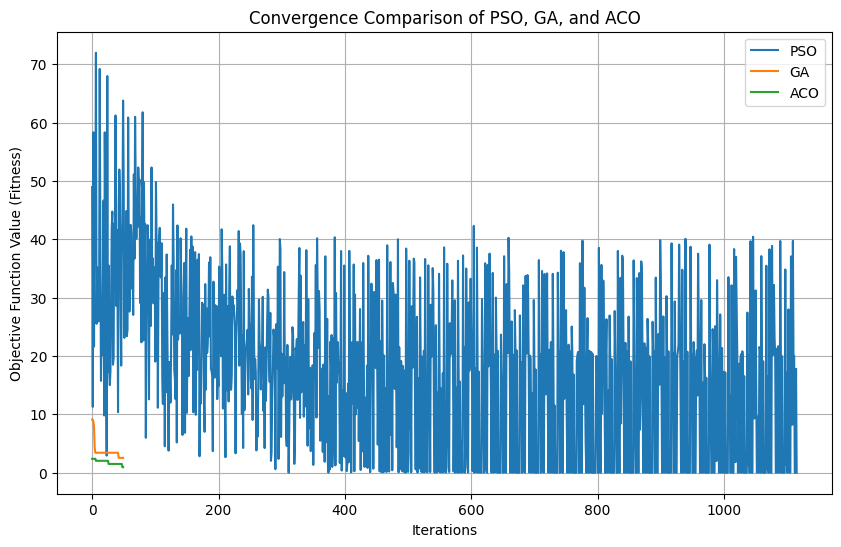

In [ ]:
# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(pso_convergence, label="PSO")
plt.plot(ga_convergence, label="GA")
plt.plot(aco_convergence, label="ACO")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value (Fitness)")
plt.title("Convergence Comparison of PSO, GA, and ACO")
plt.legend()
plt.grid()
plt.show()

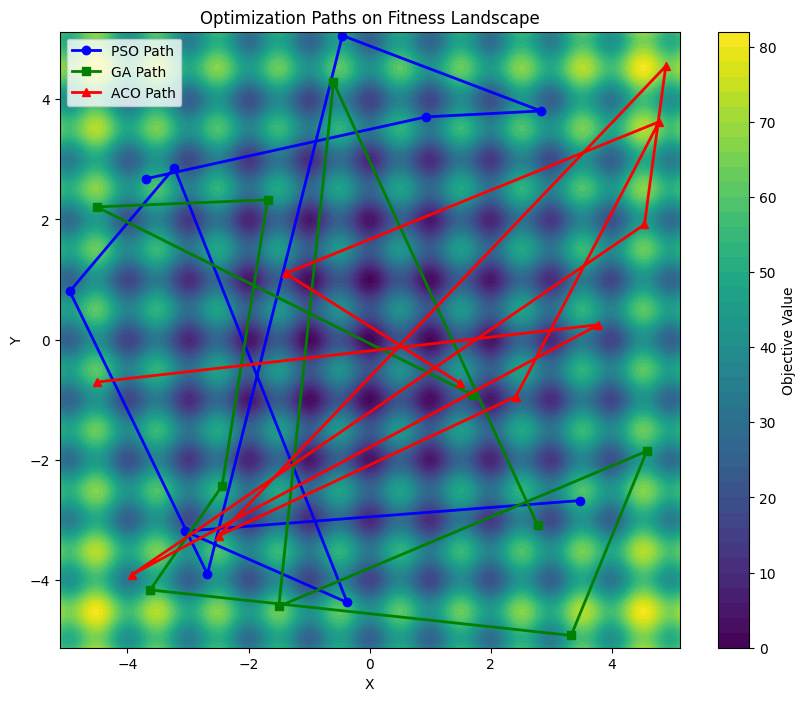

In [ ]:
def plot_2d_heatmap_with_paths(pso_path, ga_path, aco_path):
    # Generate a grid of points for the Rastrigin function
    X = np.linspace(-5.12, 5.12, 200)
    Y = np.linspace(-5.12, 5.12, 200)
    X, Y = np.meshgrid(X, Y)
    Z = rastrigin([X, Y])

    # Create 2D heatmap
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Objective Value')

    # Overlay paths for each algorithm
    pso_path = np.array(pso_path)
    ga_path = np.array(ga_path)
    aco_path = np.array(aco_path)

    plt.plot(pso_path[:, 0], pso_path[:, 1], 'b-o', label='PSO Path', lw=2)
    plt.plot(ga_path[:, 0], ga_path[:, 1], 'g-s', label='GA Path', lw=2)
    plt.plot(aco_path[:, 0], aco_path[:, 1], 'r-^', label='ACO Path', lw=2)

    # Labels and legend
    plt.title('Optimization Paths on Fitness Landscape')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Example paths (replace with actual algorithm paths)
pso_path = [np.random.uniform(-5.12, 5.12, 2) for _ in range(10)]
ga_path = [np.random.uniform(-5.12, 5.12, 2) for _ in range(10)]
aco_path = [np.random.uniform(-5.12, 5.12, 2) for _ in range(10)]

plot_2d_heatmap_with_paths(pso_path, ga_path, aco_path)


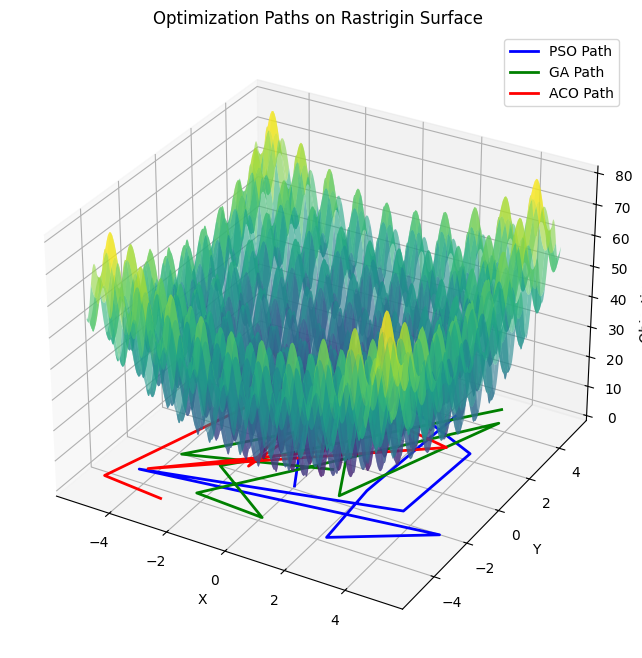

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_surface_with_paths(pso_path, ga_path, aco_path):
    # Generate a grid of points for the Rastrigin function
    X = np.linspace(-5.12, 5.12, 200)
    Y = np.linspace(-5.12, 5.12, 200)
    X, Y = np.meshgrid(X, Y)
    Z = rastrigin([X, Y])

    # Create 3D surface plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

    # Overlay paths for each algorithm
    ax.plot(*zip(*pso_path), color='blue', label='PSO Path', lw=2)
    ax.plot(*zip(*ga_path), color='green', label='GA Path', lw=2)
    ax.plot(*zip(*aco_path), color='red', label='ACO Path', lw=2)

    # Labels and legend
    ax.set_title('Optimization Paths on Rastrigin Surface')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Objective Value')
    ax.legend()
    plt.show()

# Example paths (replace with actual algorithm paths)
pso_path = [np.random.uniform(-5.12, 5.12, 2) for _ in range(10)]
ga_path = [np.random.uniform(-5.12, 5.12, 2) for _ in range(10)]
aco_path = [np.random.uniform(-5.12, 5.12, 2) for _ in range(10)]

plot_3d_surface_with_paths(pso_path, ga_path, aco_path)
